## Download dataset

In [1]:
# dataset from https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv
import requests

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv'
response = requests.get(url)

with open('penguins_data.csv', 'wb') as file:
    file.write(response.content)

## Explore and clean the data

In [1]:
import pandas as pd

In [25]:
df = pd.read_csv('penguins_data.csv')

In [26]:
len(df)

344

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [27]:
# drop rows with missing values
df = df.dropna(subset=['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [28]:
len(df)

342

In [29]:
# select only columns with relevant features
df = df[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [30]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [31]:
df['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [32]:
features = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
values = df['species'].to_numpy()

## Scale and encode the data

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [34]:
features

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]], shape=(342, 4))

In [35]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [36]:
# one-hot encode the species
encoder = LabelEncoder()
values_encoded = encoder.fit_transform(values)

In [37]:
values_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [38]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, values_encoded, test_size=0.2, random_state=42)

## Try out some models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
y_pred = clf.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred, target_names=['Adelie', 'Gentoo', 'Chinstrap']))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        35
      Gentoo       0.92      1.00      0.96        12
   Chinstrap       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



### Make a prediction on new data

In [43]:
encoder.inverse_transform(clf.predict([[40, 17, 190, 3500]]))[0]

'Gentoo'

In [44]:
print(confusion_matrix(y_test, y_pred))

[[34  1  0]
 [ 0 12  0]
 [ 0  0 22]]


In [45]:
clf.predict_proba(X_test[:4])

array([[2.43316874e-03, 1.08422977e-02, 9.86724534e-01],
       [9.99192006e-01, 7.71119169e-04, 3.68744421e-05],
       [9.95382486e-01, 4.57623344e-03, 4.12810025e-05],
       [8.75121168e-01, 1.19155948e-01, 5.72288365e-03]])

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
rf.score(X_test, y_test)

0.9710144927536232

### Explore the feature importance

Plot logistic regression coefficients

In [49]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [50]:
coefficients = clf.coef_

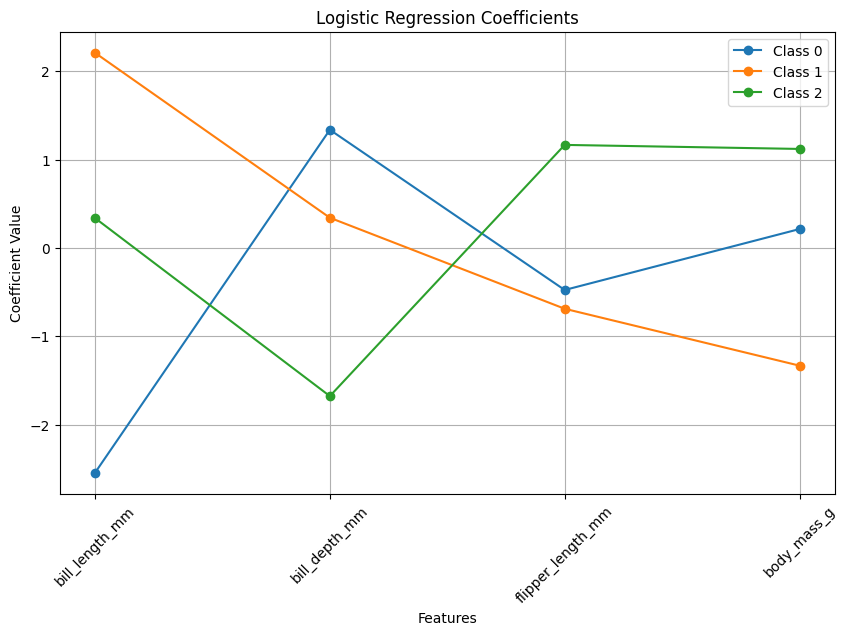

In [51]:
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[0]):
    plt.plot(np.arange(coefficients.shape[1]), coefficients[i], marker='o', label=f'Class {i}')

plt.xticks(np.arange(coefficients.shape[1]), ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.legend()
plt.grid(True)
plt.show()